# Importing the liberaries and reading the csv file.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
df = pd.read_csv("/content/players_21.csv")
df2 = df.copy()

# Exploring the data set using head , describe and info.

In [ ]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,...,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,...,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,...,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,...,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [ ]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,1.794900e+04,18719.000000,18719.000000,1127.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,2.936603,2.363017,4.296353e+06,20.589668,2021.983332,12.029281,67.668110,52.274954,57.139434,62.455430,51.316292,64.458988,65.164186,62.889102,61.719635,66.108017,37.203553,63.171867,49.612859,45.796083,51.874578,58.705448,42.669552,55.546400,47.187289,42.356155,52.653030,58.482791,64.285103,64.326489,63.333193,61.609428,63.918549,57.752798,64.590530,62.596020,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,0.667132,0.766469,1.005968e+07,17.057568,1.260426,6.674627,10.984862,13.991421,10.273655,10.048706,16.405179,9.746706,7.710474,7.328945,7.575184,8.126601,10.714523,8.565969,18.153057,19.592269,17.321709,14.572383,17.661569,18.787112,18.231204,17.239561,15.205281,16.598040,14.926452,14.689422,14.625189,9.112954,14.075215,13.330631,11.888479,15.878793,12.519775,19.305319,17.203045,20.738106,19.443738,13.724072,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,9.000000e+03,1.000000,2020.000000,1.000000,25.000000,16.000000,25.000000,25.000000,15.000000,28.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000,6.000000,3.000000,5.000000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,13.000000,12.000000,14.000000,24.000000,12.000000,18.000000,15.000000,12.000000,16.000000,4.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,5.250000e+05,9.000000,2021.000000,6.000000,62.000000,42.000000,50.000000,57.000000,36.000000,58.000000,60.000000,58.000000,57.000000,60.000000,28.000000,57.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,35.000000,31.000000

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df.info

<bound method DataFrame.info of        sofifa_id                                         player_url  ...   rcb    rb
0         158023  https://sofifa.com/player/158023/lionel-messi/...  ...  52+3  62+3
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...  ...  54+3  61+3
2         200389  https://sofifa.com/player/200389/jan-oblak/210002  ...  33+3  32+3
3         188545  https://sofifa.com/player/188545/robert-lewand...  ...  60+3  61+3
4         190871  https://sofifa.com/player/190871/neymar-da-sil...  ...  49+3  62+3
...          ...                                                ...  ...   ...   ...
18939     256679  https://sofifa.com/player/256679/kevin-angulo/...  ...  46+2  47+2
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...  ...  47+2  45+2
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...  ...  47+2  44+2
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...  ...  49+2  47+2
18943     257936   https://sofifa

# Subsetting data into smaller data set to make it easier to answer questions.

In [ ]:
df3 = df.loc[:,["league_name","wage_eur","value_eur","overall","skill_moves","international_reputation","nationality","age" , "team_position" ,"short_name" , "contract_valid_until" , "club_name"]]
df3

,league_name,wage_eur,value_eur,overall,skill_moves,international_reputation,nationality,age,team_position,short_name,contract_valid_until,club_name
0,Spain Primera Division,560000,67500000,93,4,5,Argentina,33,CAM,L. Messi,2021.0,FC Barcelona
1,Italian Serie A,220000,46000000,92,5,5,Portugal,35,LS,Cristiano Ronaldo,2022.0,Juventus
2,Spain Primera Division,125000,75000000,91,1,3,Slovenia,27,GK,J. Oblak,2023.0,Atlético Madrid
3,German 1. Bundesliga,240000,80000000,91,4,4,Poland,31,ST,R. Lewandowski,2023.0,FC Bayern München
4,French Ligue 1,270000,90000000,91,5,5,Brazil,28,LW,Neymar Jr,2022.0,Paris Saint-Germain
...,...,...,...,...,...,...,...,...,...,...,...,...
18939,Colombian Liga Postobón,500,40000,47,2,1,Colombia,24,SUB,K. Angulo,2024.0,América de Cali
18940,Chinese Super League,1000,35000,47,2,1,China PR,21,SUB,Zhang Mengxuan,2020.0,Chongqing Dangdai Lifan FC SWM Team
18941,Chinese Super League,1000,35000,47,2,1,China PR,20,RES,Wang Zhenghao,2022.0,Tianjin TEDA FC
18942,Chinese Super League,1000,40000,47,2,1,China PR,23,RDM,Chen Zitong,2023.0,Shijiazhuang Ever Bright F.C.


# Subsetting the top five leagues.


In [ ]:
top_leagues = df3[(df3["league_name"] == "Italian Serie A") | (df3["league_name"] == "English Premier League") | (df3["league_name"] == "French Ligue 1") | (df3["league_name"] == "German 1. Bundesliga") | (df3["league_name"] == "Spain Primera Division")]
top_leagues

,league_name,wage_eur,value_eur,overall,skill_moves,international_reputation,nationality,age,team_position,short_name,contract_valid_until,club_name
0,Spain Primera Division,560000,67500000,93,4,5,Argentina,33,CAM,L. Messi,2021.0,FC Barcelona
1,Italian Serie A,220000,46000000,92,5,5,Portugal,35,LS,Cristiano Ronaldo,2022.0,Juventus
2,Spain Primera Division,125000,75000000,91,1,3,Slovenia,27,GK,J. Oblak,2023.0,Atlético Madrid
3,German 1. Bundesliga,240000,80000000,91,4,4,Poland,31,ST,R. Lewandowski,2023.0,FC Bayern München
4,French Ligue 1,270000,90000000,91,5,5,Brazil,28,LW,Neymar Jr,2022.0,Paris Saint-Germain
...,...,...,...,...,...,...,...,...,...,...,...,...
18670,Italian Serie A,1000,60000,51,2,1,France,21,RES,J. Evan's Allan,2024.0,Crotone
18757,English Premier League,2000,60000,50,2,1,France,19,RES,J. Belehouan,2021.0,Sheffield United
18786,English Premier League,4000,45000,50,2,1,England,22,RES,H. Boyes,2021.0,Sheffield United
18836,Italian Serie A,2000,60000,49,2,1,Italy,18,RES,D. Bouah,2024.0,Roma


# Question: Which league has the highest amount of wages in the world?
Firstly I will answer for the top five leagues by subsetting them then count the mean of wages in those five leagues then sort them from the highest.
You may ask why top 5 leagues. The purpose of subsitting here as it is illogical that the highest wages are out of these 5 leagues.


Text(0.5, 1.0, "The average leagues' wages")

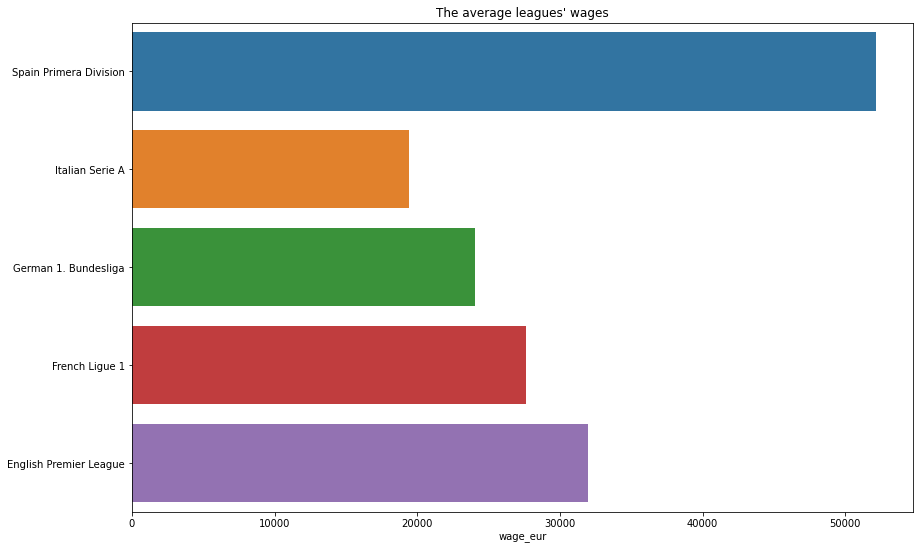

In [ ]:
top_league_wages = top_leagues.groupby("league_name")["wage_eur"].mean()
plt.figure(figsize=(14,9))
sns.barplot(x = top_league_wages , y = top_leagues["league_name"].unique()).set_title("The average leagues' wages")
#plt.xticks(rotation = 90)
#plt.yticks(rotation = 90)

My insight: It is clear that English Premier Legue on the top with average wage bigger than any other peer, then Spanish, Italian, German, French respectively. 

# Question: Who are the highest paid players in the world? 

In [ ]:
highest_wages = top_leagues.sort_values(by = ["wage_eur"], ascending=False)
highest_wages

,league_name,wage_eur,value_eur,overall,skill_moves,international_reputation,nationality,age,team_position,short_name,contract_valid_until,club_name
0,Spain Primera Division,560000,67500000,93,4,5,Argentina,33,CAM,L. Messi,2021.0,FC Barcelona
5,English Premier League,370000,87000000,91,4,4,Belgium,29,RCM,K. De Bruyne,2023.0,Manchester City
25,Spain Primera Division,350000,58000000,88,4,4,Belgium,29,LW,E. Hazard,2024.0,Real Madrid
15,Spain Primera Division,350000,53000000,89,4,4,France,32,CF,K. Benzema,2022.0,Real Madrid
24,Spain Primera Division,310000,55000000,88,3,4,Germany,30,LCM,T. Kroos,2023.0,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...
16079,English Premier League,500,250000,58,2,1,Switzerland,17,RES,Christian Marques,2023.0,Wolverhampton Wanderers
17576,English Premier League,500,150000,55,2,1,England,17,RES,C. Cresswell,2022.0,Leeds United
13890,English Premier League,500,500000,61,3,1,England,17,RES,L. Matheson,2022.0,Wolverhampton Wanderers
11884,French Ligue 1,500,725000,63,2,1,Turkey,17,RES,A. Arli,2024.0,Dijon FCO


# Now searching for reasons for these high wages.

May be there is a relation between wage and skill moves?

Text(0.5, 1.0, 'The relationship between player skill moves and his wage')

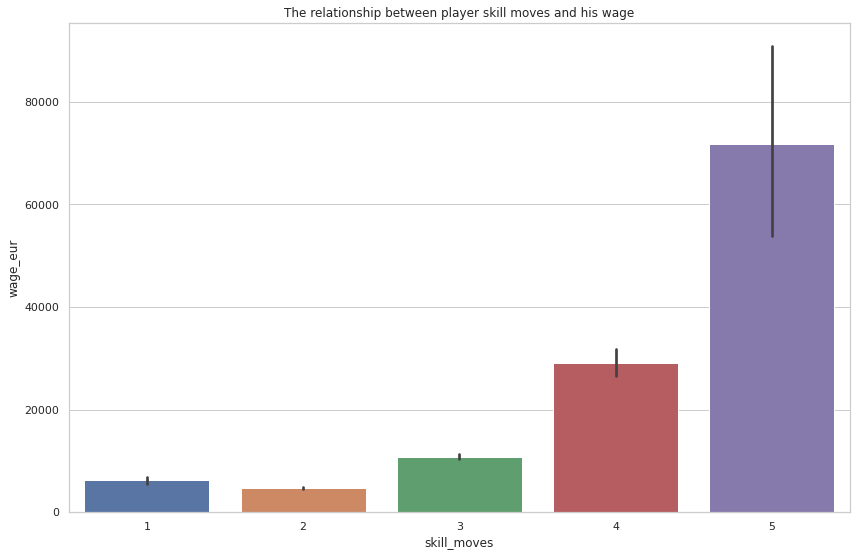

In [ ]:
plt.figure(figsize=(14,9))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="skill_moves", y="wage_eur", data=df)
ax.set_title("The relationship between player skill moves and his wage")

My insight: From the figure we can conclude that skillful players takes higher wages.

Text(0.5, 1.0, 'The relationship between player international reputition and his wage')

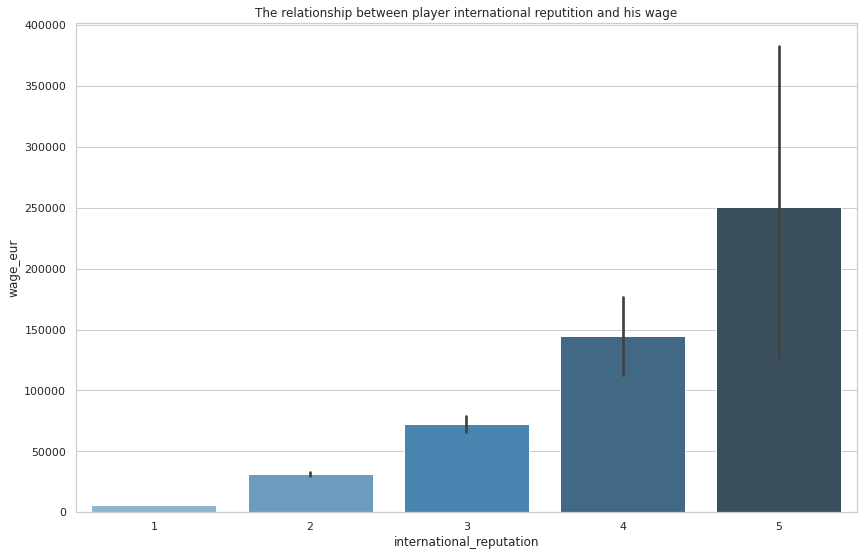

In [ ]:
plt.figure(figsize=(14,9))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="international_reputation", y="wage_eur", data=df , palette="Blues_d")
ax.set_title("The relationship between player international reputition and his wage")


My insight: There is a clear ascending relationship between the international reputaion and player's wages. The more players have an international high rate, the higher wages they take.

Text(0.5, 1.0, 'The relationship between player position and his wage')

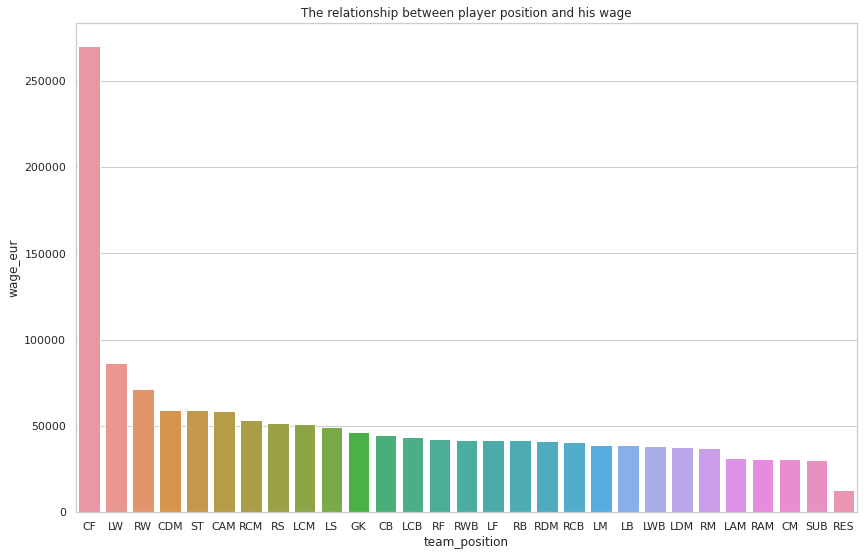

In [ ]:
plt.figure(figsize=(14,9))
sns.set_theme(style="whitegrid")
average_wages = top_leagues.groupby("team_position")["wage_eur"].mean()
ax = sns.barplot(x="team_position", y="wage_eur", data=top_leagues, ci=None,
                 order = average_wages.sort_values(ascending = False).index)
ax.set_title("The relationship between player position and his wage")
#Side important note: When the input data is the top 5 leagues the standard deviation is less than when
#we use the whole data as the players in the top 5 leagues have rates close to each other.

My insight: It is obvious that center forwards then wingers players "players who takes the responsibilty to score goals" are rewarded with more wages than their peers. 

# Question: can we determine how much each league of the top five leagues depends on foreign players not local players?

In [ ]:
top_leagues.head()

,league_name,wage_eur,value_eur,overall,skill_moves,international_reputation,nationality,age,team_position,short_name,contract_valid_until,club_name
0,Spain Primera Division,560000,67500000,93,4,5,Argentina,33,CAM,L. Messi,2021.0,FC Barcelona
1,Italian Serie A,220000,46000000,92,5,5,Portugal,35,LS,Cristiano Ronaldo,2022.0,Juventus
2,Spain Primera Division,125000,75000000,91,1,3,Slovenia,27,GK,J. Oblak,2023.0,Atlético Madrid
3,German 1. Bundesliga,240000,80000000,91,4,4,Poland,31,ST,R. Lewandowski,2023.0,FC Bayern München
4,French Ligue 1,270000,90000000,91,5,5,Brazil,28,LW,Neymar Jr,2022.0,Paris Saint-Germain


Text(0.5, 1.0, 'The Percentage of Foreign players in each league')

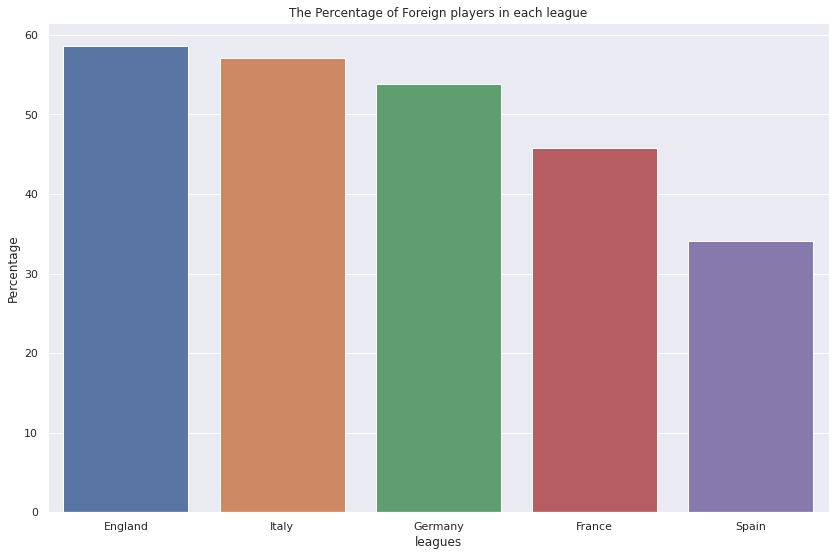

In [ ]:
Percentage = []
leagues = ["Spain" , "Italy" ,"Germany" , "France" , "England"]
for i,x in enumerate(top_leagues["league_name"].unique()):            #[(0,spain),(1,italy),(2,spain) ...]
  league = top_leagues[top_leagues["league_name"] == x] 
  percent = (league["nationality"] != leagues[i]).mean()
  Percentage.append(percent*100)
Frame = pd.DataFrame({"Percentage" : Percentage , "leagues" : leagues})
plt.figure(figsize=(14,9))
sns.barplot(x = "leagues" , y = "Percentage" , data = Frame ,
            order = Frame.sort_values("Percentage" , ascending = False).leagues).set_title("The Percentage of Foreign players in each league")


In [ ]:
league

,league_name,wage_eur,value_eur,overall,skill_moves,international_reputation,nationality,age,team_position,short_name,contract_valid_until,club_name
5,English Premier League,370000,87000000,91,4,4,Belgium,29,RCM,K. De Bruyne,2023.0,Manchester City
8,English Premier League,210000,75500000,90,2,3,Netherlands,28,LCB,V. van Dijk,2023.0,Liverpool
9,English Premier League,160000,62500000,90,1,3,Brazil,27,GK,Alisson,2024.0,Liverpool
10,English Premier League,250000,78000000,90,4,3,Senegal,28,LW,S. Mané,2023.0,Liverpool
11,English Premier League,250000,78000000,90,4,3,Egypt,28,RW,M. Salah,2023.0,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...
18360,English Premier League,4000,110000,52,2,1,England,19,RES,L. Brunt,2021.0,Aston Villa
18361,English Premier League,5000,110000,52,2,1,England,19,RES,M. Tait,2021.0,Aston Villa
18607,English Premier League,5000,80000,51,2,1,England,20,RES,C. Rowe,2021.0,Aston Villa
18757,English Premier League,2000,60000,50,2,1,France,19,RES,J. Belehouan,2021.0,Sheffield United


My insight: The English premiere league is the first league that depends on foreign players then Italy, Germany, France, Spain respectively. 

# Question: What is the most aged leagues? and what are the leagues that depends on youth more than experienced old players?

Text(0.5, 1.0, 'The relationship between player position and his wage')

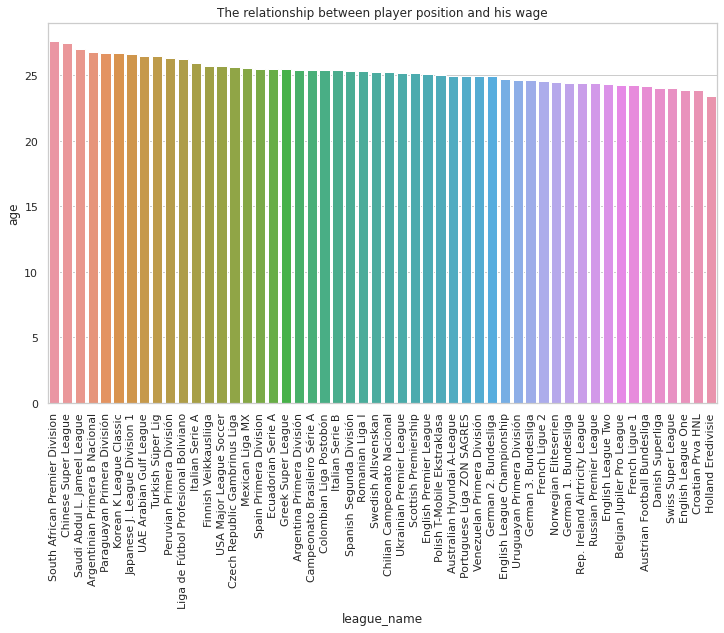

In [ ]:
plt.figure(figsize=(12,7))
sns.set_theme(style="whitegrid")
average_ages = df.groupby("league_name")["age"].mean()
ax = sns.barplot(x = "league_name" , y = "age" , data = df , ci = None , order = average_ages.sort_values(ascending = False).index)
plt.xticks(rotation = 90)
ax.set_title("The relationship between player position and his wage")

My insight: The more professional leagues have lower age rates than amatuer leagues. Also European leagues have lower age rates than other conitnents.


# We can know how many players prefer their left foot and how many prefer right foot.

Text(0.5, 1.0, 'The number of players in each preferred foot')

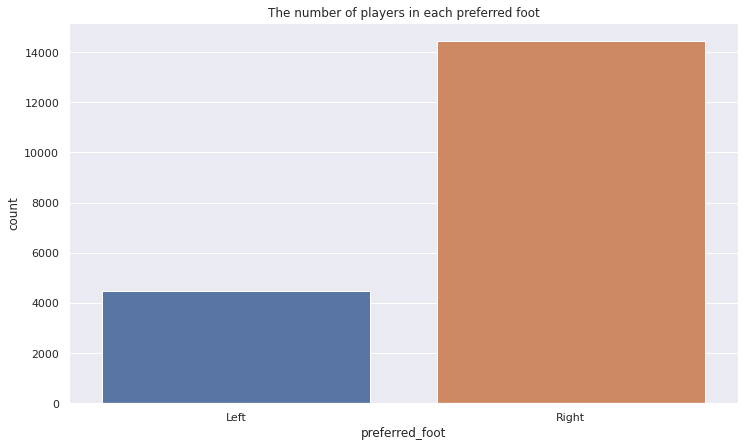

In [ ]:
#using count plot.
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.countplot(data = df , x="preferred_foot" ).set_title("The number of players in each preferred foot")

My insight: as shown in the figure left foot player are rare compared to right foot players.

# Question: Is there a relationship between the preferred foot of players and their skill moves?


Text(0.5, 1.0, 'The relationship between skill moves and prefered foot')

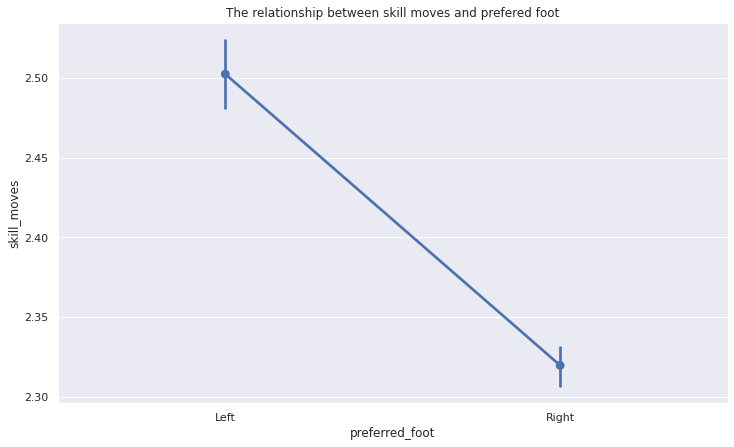

In [ ]:
#using point plot.
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.pointplot(x="preferred_foot" , y = "skill_moves", data = df).set_title("The relationship between skill moves and prefered foot")

My insight: left foot players are more skillful than right footers.

# Question: What is the relationship among players position, their vision in the pitch and their skill moves?


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text major ticklabel objects>)

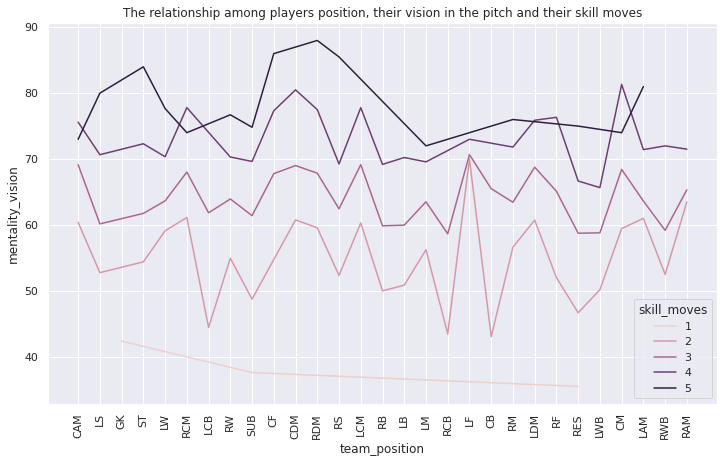

In [ ]:
#using line plot.
plt.figure(figsize = (12,7))
ax = sns.lineplot(x = "team_position" , y = "mentality_vision" , hue = "skill_moves" , data = df , ci = None , markers = True)
ax.set_title("The relationship among players position, their vision in the pitch and their skill moves")
plt.xticks(rotation = 90)

My insight: Skillful players are advanced in mentality vision than less skillful players. Also, midfielder players have a vision better than position. 

# Question: What are the validity of contracts in the clubs?

Text(0.5, 1.0, 'Players contracts')

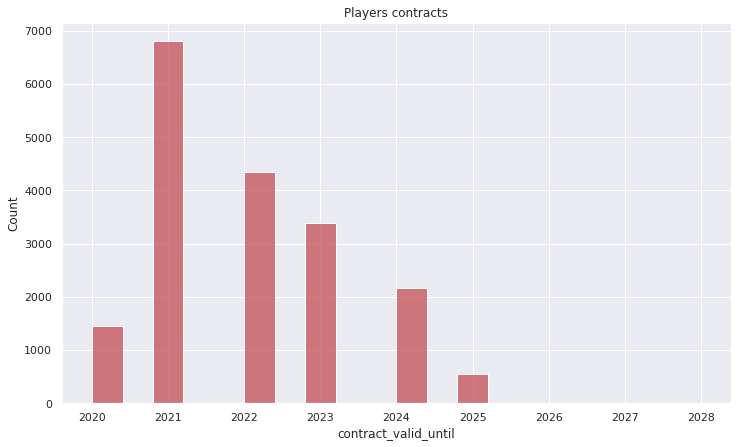

In [ ]:
#using hisograms
plt.figure(figsize = (12,7))
ax = sns.histplot(data=df, x='contract_valid_until', bins=20, color = 'r')
ax.set_title("Players contracts")

My insight: This graph shows that most contracts are valid till 2021 which is not a good news for the clubs.

Text(0.5, 1.0, "The validity of clubs' contracts")

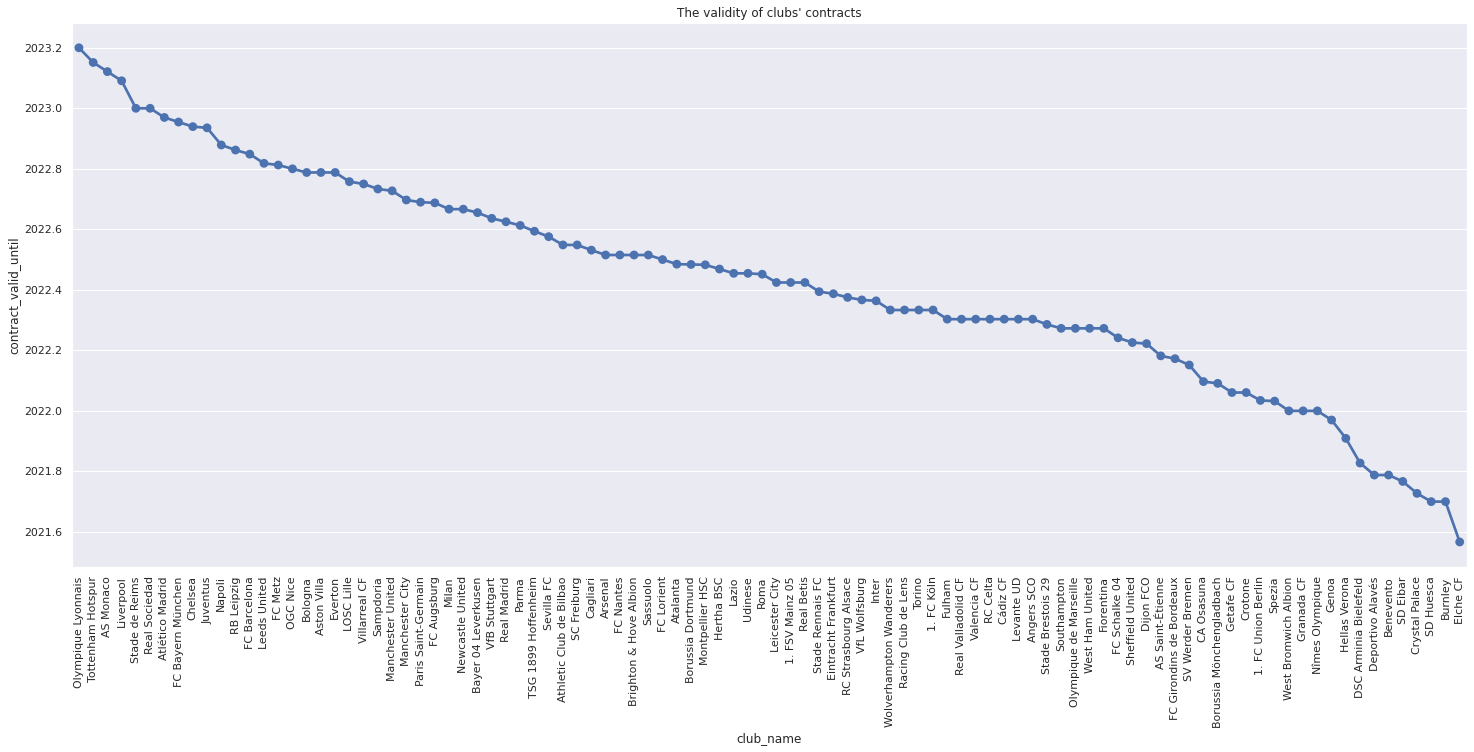

In [ ]:
#using point plot
plt.figure(figsize=(25,10))
sns.set_theme(style="darkgrid")
average_contracts = top_leagues.groupby("club_name")["contract_valid_until"].mean()
ax = sns.pointplot(x="club_name", y = "contract_valid_until", data = top_leagues , ci = None , order = average_contracts.sort_values(ascending = False).index)
plt.xticks(rotation = 90)
ax.set_title("The validity of clubs' contracts")

My insight: There are some clubs in a dangerous situation as many players' contracts need to be resigned for more years at the same time like Elche and Burnley. Also, this graph shows that clubs like Tottenham and Liverpool are in the safe side.